In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import requests
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen, urlretrieve
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_svmlight_file
iris = datasets.load_iris()

In [2]:
print(iris.DESCR) # opis danych
print(iris.data)  # features, cechy
print(type(iris.data)) # tablica NumPy ndarray
print(iris.data.shape) # rozmiar tablicy zwraca tuple
print(iris.feature_names) # lista nazw dla iris.data
print(iris.target)  # zmienna celu (target)
print(iris.target.dtype) # tablica NumPy
print(iris.target.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

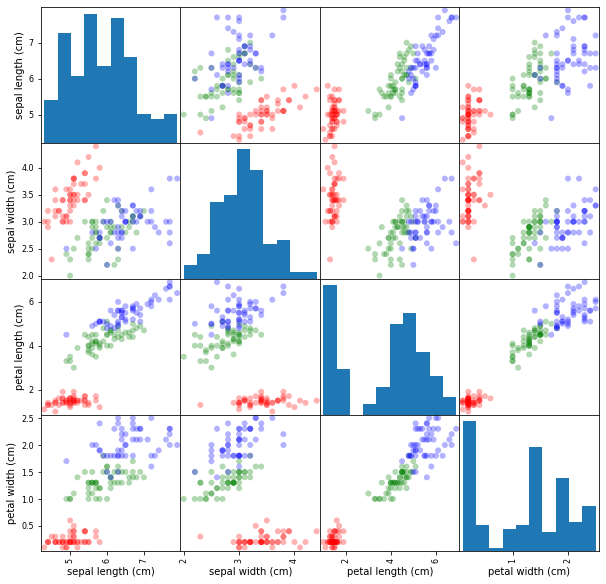

In [28]:
colors = []
palette = {0:"red", 1:"green", 2:"blue"}
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sc = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal="hist", color=colors, marker="o", grid="True")

In [47]:
#target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
#result = urlopen(target_page)
result = requests.get('http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a', verify=False)
X, y = load_svmlight_file(result)
print(X.shape, y.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


TypeError: expected {str, int, file-like}, got <class 'requests.models.Response'>

In [31]:
urlretrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.data")

('iris.data', <http.client.HTTPMessage at 0x136292d90>)

In [36]:
column_names =['sepal_length','sepal_width','petal_length','petal_width','target']
iris_filename = 'iris.data'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', header=None, names=column_names)
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [37]:
X,y = datasets.make_classification(n_samples=10**6, n_features = 10, random_state=1234)
print(X.shape, y.shape)

(1000000, 10) (1000000,)


In [38]:
df = pd.read_excel('Excel_Sample.xlsx', na_values = 'n/a')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
Unnamed: 0    4 non-null int64
a             4 non-null int64
b             4 non-null int64
c             3 non-null float64
d             4 non-null int64
dtypes: float64(1), int64(4)
memory usage: 288.0 bytes


In [48]:
df = pd.read_csv("polish_names.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
name      1705 non-null object
gender    1705 non-null object
dtypes: object(2)
memory usage: 26.8+ KB


In [51]:
df.gender.value_counts()

m    1033
f     672
Name: gender, dtype: int64

In [52]:
df.head(10)

,name,gender
0,Abdon,m
1,Abel,m
2,Abercjusz,m
3,Abraham,m
4,Absalon,m
5,Achacjusz,m
6,Achacy,m
7,Achilles,m
8,Ada,f
9,Adalbert,m


In [53]:
df.sample(10)

,name,gender
928,Martynian,m
88,Angelus,m
972,Mirella,f
677,Jowita,f
609,Imisław,m
196,Boguchwał,m
1396,Tytus,m
689,Julita,f
546,Gedeon,m
106,Ariela,f


In [54]:
df['gender'].value_counts()

m    1033
f     672
Name: gender, dtype: int64

In [55]:
def transform_string_into_number(string):
    return int(string == 'm')
    
df['gender'].head().map( transform_string_into_number )

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [56]:
df['target'] = df['gender'].map(lambda x: int(x == 'm'))
df.head(10)

,name,gender,target
0,Abdon,m,1
1,Abel,m,1
2,Abercjusz,m,1
3,Abraham,m,1
4,Absalon,m,1
5,Achacjusz,m,1
6,Achacy,m,1
7,Achilles,m,1
8,Ada,f,0
9,Adalbert,m,1


In [59]:
df['len_name'] = df['name'].map(lambda x: len(x))

In [62]:
print(df)

           name gender  target  len_name
0         Abdon      m       1         5
1          Abel      m       1         4
2     Abercjusz      m       1         9
3       Abraham      m       1         7
4       Absalon      m       1         7
...         ...    ...     ...       ...
1700  Zbigniewa      f       0         9
1701   Zygfryda      f       0         8
1702   Hermenia      f       0         8
1703     Hermes      m       1         6
1704    Humbert      m       1         7

[1705 rows x 4 columns]


In [63]:
# tablica zmiennych na podstawie których chcemy przeprowadzić analizę
X = df[ ['len_name'] ].values
# wyniki dla uczenia z nadzorem
y = df['target'].values
# wybierz model 
model = DummyClassifier()
# dopasuj model do danych
model.fit(X, y)
# stwórz tablicę z predykcjami  
y_pred = model.predict(X)
# zobacz ile predykcji model dobrze oznaczył
accuracy_score(y, y_pred)

0.521407624633431

In [65]:
# tablica zmiennych na podstawie których chcemy przeprowadzić analizę
X = df[ ['len_name'] ].values
# wyniki dla uczenia z nadzorem
y = df['target'].values
# wybierz model 
model = LogisticRegression()
# dopasuj model do danych
model.fit(X, y)
# stwórz tablicę z predykcjami  
y_pred = model.predict(X)
# zobacz ile predykcji model dobrze oznaczył
accuracy_score(y, y_pred)

/Users/przemek/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6058651026392962

In [67]:
cv = CountVectorizer()
X = cv.fit_transform(df['name'].values)
y = df['target'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.333, random_state=0)

In [68]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/przemek/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6197183098591549

In [69]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6197183098591549

In [70]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6197183098591549

In [71]:
df.head()

,name,gender,target,len_name
0,Abdon,m,1,5
1,Abel,m,1,4
2,Abercjusz,m,1,9
3,Abraham,m,1,7
4,Absalon,m,1,7


In [74]:
name = ['Humbert']
name_vector = cv.transform(name).toarray()
model.predict(name_vector)

array([1])

In [75]:
name = ['Antonina']
name_vector = cv.transform(name).toarray()
model.predict(name_vector)

array([1])